In [1]:
! pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 54kB/s 


In [2]:
! pip install keras

In [3]:
! pip install pandas

In [4]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.1
Hub version: 0.9.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
#from keras.applications.inception_v3 import InceptionV3
#from keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.datasets import mnist

In [6]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import os
import cv2

In [7]:
import pandas as pd
import numpy as np

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [56]:
random_state = 100
X_train, y_train = shuffle(X_train, y_train, random_state = random_state)
X_test, y_test = shuffle(X_test, y_test, random_state = random_state)

In [57]:
class_labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

[28922, 41291, 33351, 47244, 38558, 7583, 7784, 45037, 50228, 37038]


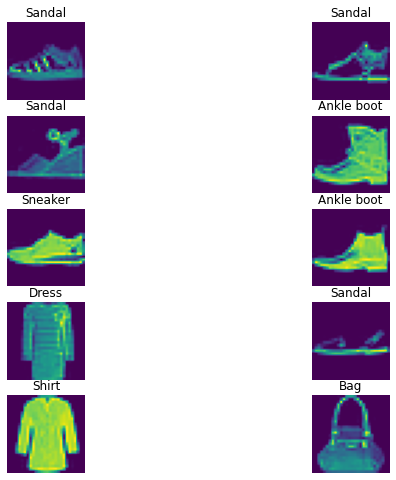

In [59]:
import random
from random import sample
plt.figure(figsize=(10,10))
random_indexes = sample(range(1, 60000), 10)
print(random_indexes)
for i, img_index in enumerate(random_indexes):

  # Set up subplot; subplot indices start at 1
  sp=plt.subplot(6,2, i + 1)
  sp.set_title(class_labels[y_train[img_index]])
  sp.axis('Off') # Don't show axes (or gridlines)
  plt.imshow(X_train[img_index])


In [61]:
X_train.shape

(60000, 28, 28)

In [62]:
y_train.shape

(60000,)

In [63]:
X_test.shape

(10000, 28, 28)

In [64]:
X_train[0].shape

(28, 28)

In [65]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,  82,  72,   0, 117,  74,  81,  75,  78,  80,  79,  79,
         65,  58,  59,  58,  56,  62,  67,  70,  68,  65,  74,  24,   0,
          0,   0],
       [  

'T-shirt/top'

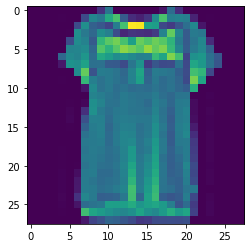

In [79]:
plt.imshow(X_train[1000])
class_labels[y_train[1000]]

In [80]:
y_train

array([8, 6, 6, ..., 3, 0, 9], dtype=uint8)

In [81]:
X_train=X_train/255
X_test=X_test/255

In [82]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [83]:
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [84]:
y_train.shape

(60000, 10)

In [85]:
y_test.shape

(10000, 10)

In [86]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [87]:
model = Sequential([Flatten(input_shape=(28,28)),
                     Dense(100,activation='relu'),
                    Dense(50,activation='relu'),
                    Dense(10, activation='softmax')])
model.summary()
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5042 - accuracy: 0.8191 - val_loss: 0.4385 - val_accuracy: 0.8428
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3757 - accuracy: 0.8627 - 

In [88]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5430 - accuracy: 0.8900


[0.5430200099945068, 0.8899999856948853]

In [89]:
y_pred=model.predict(X_test)
y_pred_labels= np.argmax(y_pred, axis=1)
y_pred_labels

y_pred_counts = np.unique(y_pred_labels, return_counts=True)
y_pred_counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1041, 1022, 1085,  956, 1015,  986,  894, 1015,  983, 1003]))

In [90]:
y_real_labels= np.argmax(y_test, axis=1)
y_real_labels

y_real_counts = np.unique(y_real_labels, return_counts=True)
y_real_counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [91]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_pred_labels,y_real_labels)
c_m

array([[858,   3,  14,  22,   1,   0, 136,   0,   6,   1],
       [  2, 985,   2,  23,   2,   0,   6,   0,   2,   0],
       [ 24,   3, 840,  12, 105,   0,  94,   0,   7,   0],
       [ 17,   5,   6, 869,  27,   1,  27,   0,   4,   0],
       [  5,   3,  75,  44, 818,   0,  67,   0,   3,   0],
       [  2,   0,   0,   0,   0, 968,   0,   9,   2,   5],
       [ 87,   0,  61,  26,  45,   0, 669,   0,   6,   0],
       [  0,   0,   0,   0,   0,  18,   0, 963,   3,  31],
       [  5,   1,   2,   4,   2,   1,   1,   0, 967,   0],
       [  0,   0,   0,   0,   0,  12,   0,  28,   0, 963]])

Text(33.0, 0.5, 'Actual')

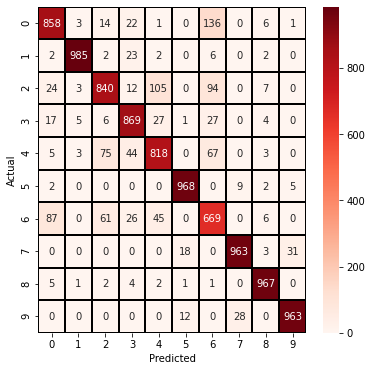

In [92]:
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [93]:
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score
acc_score = accuracy_score(y_real_labels, y_pred_labels)
acc_score

0.89

In [94]:
y_pred=model.predict(X_test)

y_pred_2=np.argmax(y_pred[2])
y_pred_2

0

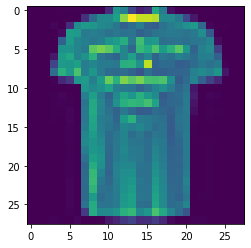

In [95]:
plt.imshow(X_test[2])

In [96]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [97]:
class_labels[y_pred_2]

'T-shirt/top'